<a href="https://colab.research.google.com/github/pseudo-sm/cv-dl-basic/blob/master/Torch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
import pandas as pd

In [2]:
x = torch.tensor(3.5,requires_grad=True)

In [3]:
y = (x-1)*(x-2)*(x-3)

In [4]:
y

tensor(1.8750, grad_fn=<MulBackward0>)

In [5]:
y.backward()

In [6]:
x.grad

tensor(5.7500)

In [7]:
from keras.datasets import mnist

In [18]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


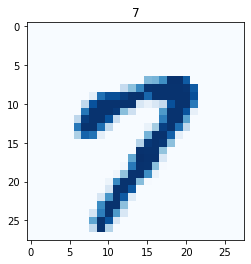

In [23]:
row = 15
image = train_X[row]
label = train_y[row]
plt.title(label)
plt.imshow(image,cmap='Blues',interpolation='none')
plt.show()

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn

In [5]:
from torch.utils.data import Dataset

In [6]:
import pandas as pd

In [113]:
class Classifier(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(784,200),nn.LayerNorm(200),nn.LeakyReLU(0.02),nn.Linear(200,10),nn.Sigmoid()
        )
    self.loss_function = nn.BCELoss()
    self.optimiser = torch.optim.Adam(self.parameters())
    self.counter = 0
    self.progress = []
  
  def forward(self,inputs):
    return self.model(inputs)
  
  def train(self,inputs,targets):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs,targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.counter+=1
    if(self.counter%10==0):
      self.progress.append(loss.item())
    if(self.counter%1000==0):
      print("Counter : {}".format(self.counter))
  
  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns = ['Loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))


In [114]:
class MnistDataset(Dataset):
  def __init__(self,csv_file):
    self.data_df = pd.read_csv(csv_file,header=None)
  
  def __len__(self):
    return len(self.data_df)

  def __getitem__(self,index):
    label=self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label]=1.0
    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
    return label,image_values,target
  
  def plot_image(self,index):
    arr = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("Label : {}".format(self.data_df.iloc[index,0]))
    plt.imshow(arr,interpolation='none',cmap='Blues')



In [115]:
mnist_dataset = MnistDataset("/content/sample_data/mnist_train_small.csv")

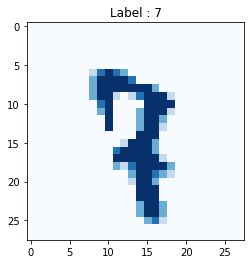

In [116]:
mnist_dataset.plot_image(100)

In [117]:
%%time

c = Classifier()
epochs = 3
for i in range(epochs):
  print('training epoch : {}/{}'.format(i+1,epochs))
  for label,image_data_tensor,target_tensor in mnist_dataset:
    c.train(image_data_tensor,target_tensor)


training epoch : 1/3
Counter : 1000
Counter : 2000
Counter : 3000
Counter : 4000
Counter : 5000
Counter : 6000
Counter : 7000
Counter : 8000
Counter : 9000
Counter : 10000
Counter : 11000
Counter : 12000
Counter : 13000
Counter : 14000
Counter : 15000
Counter : 16000
Counter : 17000
Counter : 18000
Counter : 19000
Counter : 20000
training epoch : 2/3
Counter : 21000
Counter : 22000
Counter : 23000
Counter : 24000
Counter : 25000
Counter : 26000
Counter : 27000
Counter : 28000
Counter : 29000
Counter : 30000
Counter : 31000
Counter : 32000
Counter : 33000
Counter : 34000
Counter : 35000
Counter : 36000
Counter : 37000
Counter : 38000
Counter : 39000
Counter : 40000
training epoch : 3/3
Counter : 41000
Counter : 42000
Counter : 43000
Counter : 44000
Counter : 45000
Counter : 46000
Counter : 47000
Counter : 48000
Counter : 49000
Counter : 50000
Counter : 51000
Counter : 52000
Counter : 53000
Counter : 54000
Counter : 55000
Counter : 56000
Counter : 57000
Counter : 58000
Counter : 59000
Co

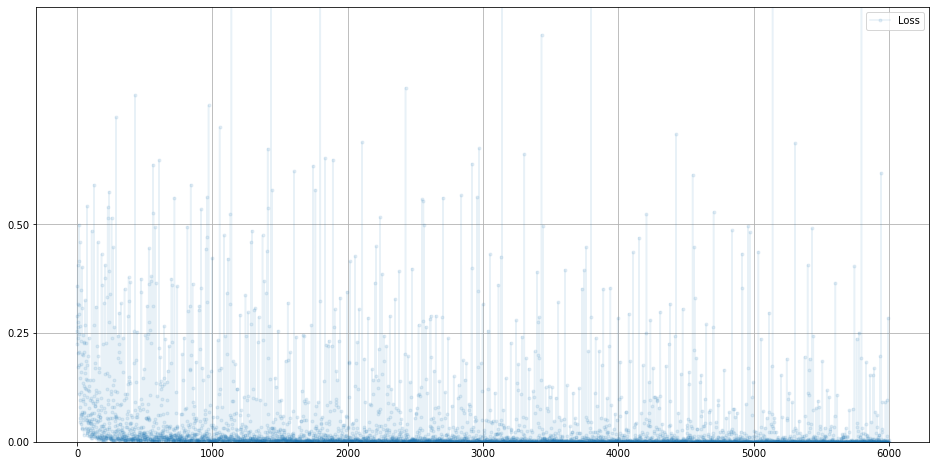

In [118]:
c.plot_progress()

In [119]:
mnist_test_dataset=MnistDataset("/content/sample_data/mnist_test.csv")

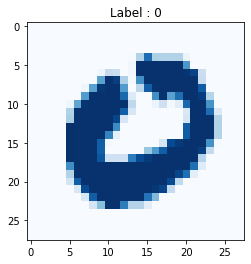

In [120]:
record = 25
mnist_test_dataset.plot_image(record)

In [121]:
image_data = mnist_test_dataset[record][1]

In [122]:
output = c.forward(image_data)

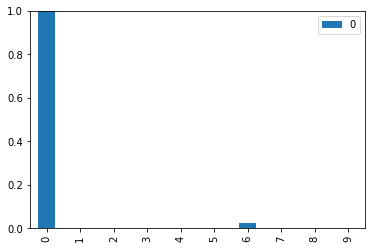

In [123]:
pd.DataFrame(output.detach().numpy()).plot(kind='bar',ylim=(0,1))

In [124]:
score = 0
items = 0
for label,image_data_tensor,target_tensor in mnist_test_dataset:
  answer = c.forward(image_data_tensor).detach().numpy()
  if(answer.argmax()==label):
    score+=1
  items+=1

print(score,items,score*100/items)

9644 10000 96.44
